In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#libraries for EDA & EDA preprocessing
from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline



#libraries for ML preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

#libraries for models
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [127]:
!pip install yellowbrick

In [128]:
"""Load DataFrame"""
df = pd.read_csv('./data/cleaned_data.csv') 
df = pd.DataFrame(df)
df.head()

,Unnamed: 0,Price,city,History,Millage,Ratings,Year,Make,Model,Transmission,Age
0,0,6813000.0,Lagos,foreign,127542.0,4.9,2010.0,Lexus,RX 350,Automatic,11.0
1,1,2325000.0,Lagos,foreign,99543.0,4.7,2004.0,Toyota,Camry,Automatic,17.0
2,2,3015000.0,Abuja,local,91391.0,4.8,2009.0,Honda,Pilot,Automatic,12.0
3,3,1565000.0,Abuja,local,219266.0,4.5,2004.0,Toyota,Sienna,Automatic,17.0
4,4,645000.0,Abuja,local,294312.0,3.9,1997.0,Honda,CR-V,Automatic,24.0


# Pre-processing

## Dealing with missing values

In [129]:
df.isnull().sum() #return series of columns with respective of number of null values

Unnamed: 0        0
Price             0
city              0
History           0
Millage           0
Ratings         341
Year              0
Make              0
Model             0
Transmission      0
Age               0
dtype: int64

In [130]:
print(df.describe())

        Unnamed: 0         Price       Millage      Ratings         Year  \
count  8012.000000  8.012000e+03  8.012000e+03  7671.000000  8012.000000   
mean   4071.713180  5.249760e+06  1.313458e+05     4.452718  2008.794309   
std    2347.375636  7.677130e+06  1.115247e+05     0.718393     4.170786   
min       0.000000  2.450000e+05  0.000000e+00     1.000000  1970.000000   
25%    2038.750000  1.820000e+06  6.781400e+04     4.000000  2008.000000   
50%    4077.500000  3.282500e+06  1.105925e+05     4.800000  2008.000000   
75%    6105.250000  5.790000e+06  1.718308e+05     5.000000  2011.000000   
max    8123.000000  1.552500e+08  2.293968e+06     5.000000  2020.000000   

               Age  
count  8012.000000  
mean     12.205691  
std       4.170786  
min       1.000000  
25%      10.000000  
50%      13.000000  
75%      13.000000  
max      51.000000  


In [131]:
# We drop the year because we have the age of the cars

df.drop(['Unnamed: 0','Year'],axis=1,inplace=True)

In [132]:
df

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
0,6813000.0,Lagos,foreign,127542.0,4.9,Lexus,RX 350,Automatic,11.0
1,2325000.0,Lagos,foreign,99543.0,4.7,Toyota,Camry,Automatic,17.0
2,3015000.0,Abuja,local,91391.0,4.8,Honda,Pilot,Automatic,12.0
3,1565000.0,Abuja,local,219266.0,4.5,Toyota,Sienna,Automatic,17.0
4,645000.0,Abuja,local,294312.0,3.9,Honda,CR-V,Automatic,24.0
...,...,...,...,...,...,...,...,...,...
8007,576000.0,Lagos,local,168564.0,5.0,Odyssey,2000,Automatic,13.0
8008,930000.0,Abuja,local,755271.0,3.0,Peugeot,307,Automatic,13.0
8009,13810000.0,Port Harcourt,local,6324.0,5.0,Toyota,Highlander,Automatic,13.0
8010,2655000.0,Lagos,local,168915.0,4.0,Mercedes-Benz,C300,Automatic,13.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         8012 non-null   float64
 1   city          8012 non-null   object 
 2   History       8012 non-null   object 
 3   Millage       8012 non-null   float64
 4   Ratings       7671 non-null   float64
 5   Make          8012 non-null   object 
 6   Model         8012 non-null   object 
 7   Transmission  8012 non-null   object 
 8   Age           8012 non-null   float64
dtypes: float64(4), object(5)
memory usage: 563.5+ KB


In [134]:
## we have to Convert the Price and Millage to intergers
df['Millage'] = pd.to_numeric(df['Millage'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         8012 non-null   float64
 1   city          8012 non-null   object 
 2   History       8012 non-null   object 
 3   Millage       8012 non-null   float64
 4   Ratings       7671 non-null   float64
 5   Make          8012 non-null   object 
 6   Model         8012 non-null   object 
 7   Transmission  8012 non-null   object 
 8   Age           8012 non-null   float64
dtypes: float64(4), object(5)
memory usage: 563.5+ KB


In [136]:
df.dropna(inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 0 to 8011
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         7671 non-null   float64
 1   city          7671 non-null   object 
 2   History       7671 non-null   object 
 3   Millage       7671 non-null   float64
 4   Ratings       7671 non-null   float64
 5   Make          7671 non-null   object 
 6   Model         7671 non-null   object 
 7   Transmission  7671 non-null   object 
 8   Age           7671 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.3+ KB


In [138]:
df.isnull().sum()

Price           0
city            0
History         0
Millage         0
Ratings         0
Make            0
Model           0
Transmission    0
Age             0
dtype: int64

In [139]:
df.shape

(7671, 9)

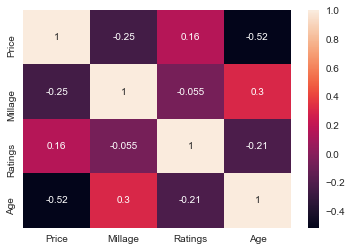

In [140]:
sns.heatmap(df.corr(),annot=True)

### Outlier Detection

In [141]:
from IPython.display import display, Latex
outliers_condi = Latex(r" $\textbf{W𝑒 𝑐𝑎𝑛 𝑠𝑎𝑦 $𝑥_1$ or $x_2$ 𝑖𝑠 𝑜𝑢𝑡𝑙𝑖𝑒𝑟𝑠 if }\\ x_1 < Q1 - 1.5*IQR \\ or\\ x_2 > Q3+1.5*IQR $")
outliers_info = Latex(r"$L_{p} = \frac{p}{100}(n+1) = i_p.f_p \\ where \,\, i_p \,\, is \,\, integer \,\, part \,\, of \,\, L_p \,\, and \,\, f_p \,\, is \,\, fractional \,\, part \,\, of \,\, L_p \\ Q1 = Y_{25} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ Q3 = Y_{75} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ IQR = Q3-Q1 \\ x_1 = Q1 - 1.5*IQR \,\,and\,\, x_2 = Q3+1.5*IQR $")

display(outliers_info)
display(outliers_condi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [142]:
#it will return the range of the variables and the values outside this range will be outliers

def outliers(arr,col):
    x = sorted(arr[col].values.ravel())
    L_25 = 25/100*(len(x)+1) #L_p where p=25%
    i_p = int(str(L_25).split(".")[0])
    f_p = int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75 = 75/100*(len(x)+1) #L_p where p=75%
    i_p = int(str(L_75).split(".")[0])
    f_p = int(str(L_75).split(".")[1])
    q3 = x[i_p]+f_p*(x[i_p+1]-x[i_p])

    IQR = q3-q1
    x1 = q1-1.5*IQR
    x2 = q3+1.5*IQR
    
    return (x1,x2)

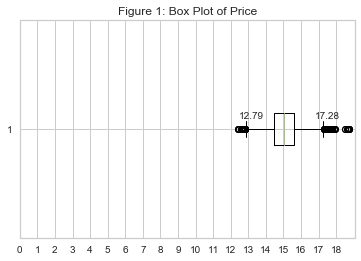

In [143]:
#Box Plot of Price

def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)

df['logprice'] = np.log(df['Price'])
x = df['logprice']
price_range = list(range(0,int(max(df['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df)[0]-0.3,1.05,str(round(min_max_price(df)[0],2)))
plt.text(min_max_price(df)[1]-0.5,1.05,str(round(min_max_price(df)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()

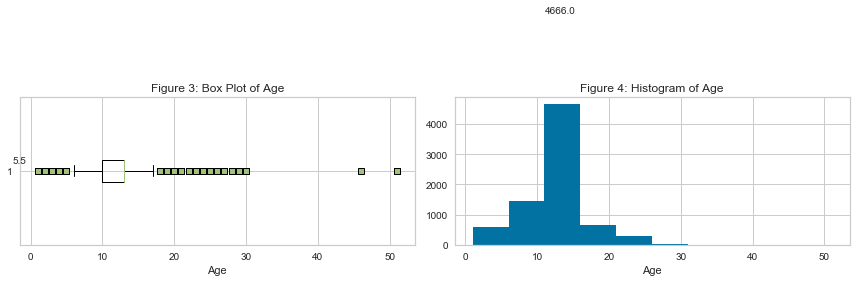

In [144]:
#Box Plot of Age

#ploting boxplot

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
o1, o2 = outliers(df,'Age')
ax1.boxplot(sorted(df['Age']), vert=False, flierprops=red_square)
ax1.set_xlabel("Age")
ax1.set_title("Figure 3: Box Plot of Age")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(df['Age'])
n, bins, patches = ax2.hist(x = df['Age'], bins=bins)
ax2.set_xlabel("Age")
ax2.set_title("Figure 4: Histogram of Age")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-age.jpg',dpi=1200)

In [145]:
#Removing outliers 

df_new = df.copy()
out=np.array(['logprice','Age'])
for col in out:
    o1, o2 = outliers(df_new,col)
    df_new = df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new = df_new[df_new['Price']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 12.788468724799017 17.28408561718488
IQR of Age = 5.5 17.5


In [146]:
df_new.head()


,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
0,6813000.0,Lagos,foreign,127542.0,4.9,Lexus,RX 350,Automatic,11.0
1,2325000.0,Lagos,foreign,99543.0,4.7,Toyota,Camry,Automatic,17.0
2,3015000.0,Abuja,local,91391.0,4.8,Honda,Pilot,Automatic,12.0
3,1565000.0,Abuja,local,219266.0,4.5,Toyota,Sienna,Automatic,17.0
6,1515000.0,Abuja,local,161427.0,4.6,Hyundai,Santa Fe,Automatic,14.0


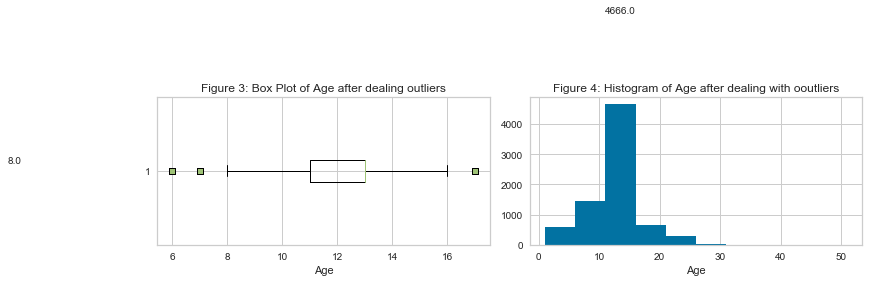

In [147]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
o1, o2 = outliers(df_new,'Age')
ax1.boxplot(sorted(df_new['Age']), vert=False, flierprops=red_square)
ax1.set_xlabel("Age")
ax1.set_title("Figure 3: Box Plot of Age after dealing outliers")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(df['Age'])
n, bins, patches = ax2.hist(x = df['Age'], bins=bins)
ax2.set_xlabel("Age")
ax2.set_title("Figure 4: Histogram of Age after dealing with ooutliers")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-age-outliers-worked-on.jpg',dpi=1200)

In [148]:
print("Shape before process=",df.shape)
print("Shape After process=",df_new.shape)
diff = df.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff,df.shape[1]-df_new.shape[1]))
df_new.to_csv("vehiclesFinal.csv",index=False)

Shape before process= (7671, 10)
Shape After process= (6506, 9)
Total 1165 rows and 1 cols removed


In [149]:
# df_Final

In [150]:
# df_Final.info()

In [151]:
# df_Final.describe()

The highest number of years a car has been used and then put up for sale is 17 years. On average car has been driven 1331871 kilometres

# Exploratory Data Analysis

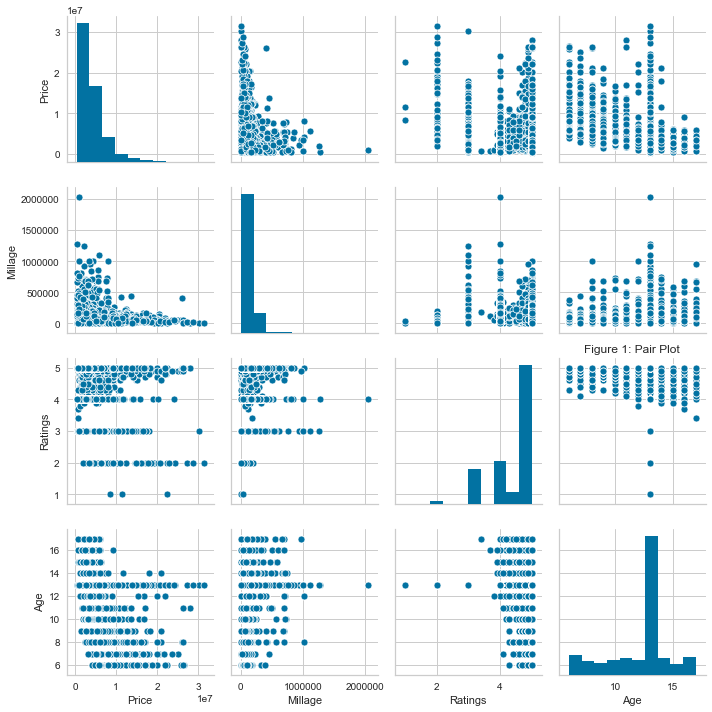

In [152]:
sns.pairplot(df_Final)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

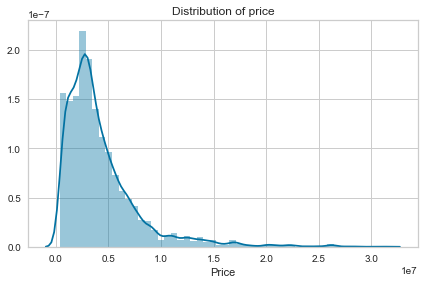

In [153]:
sns.distplot(df_new.Price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

The Distribution of Price follows a Weibull probability density function

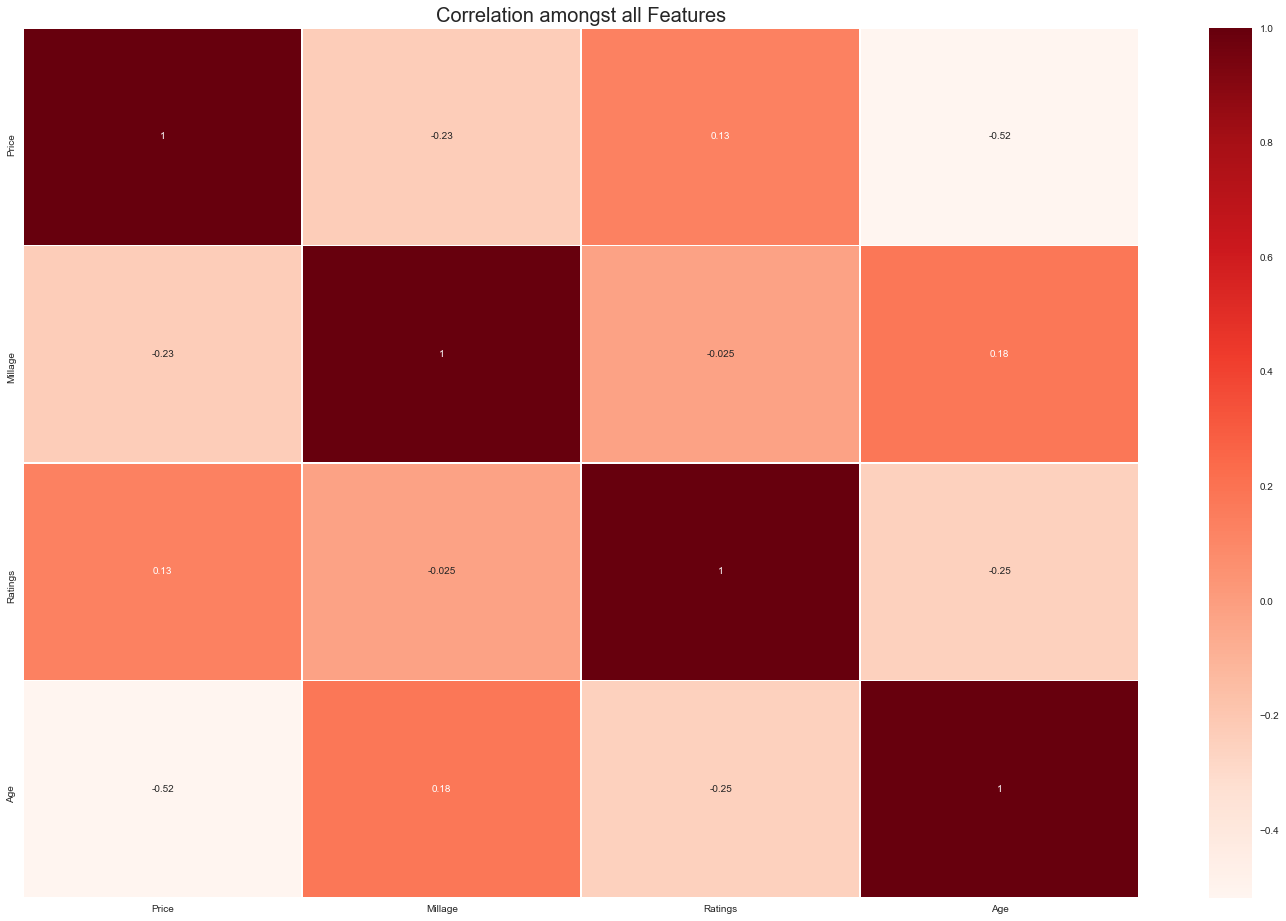

In [154]:
#Correlation Map of all Features in the dataset

plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df_new.corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Correlation amongst all Features', fontsize=20)
hm;

Correlation Map on all features the closer the values are to 1 the high there is a correlation between those features but here we have a very weak positive correlation e.g Price and Year have a correlation of 0.6 meaning there's a positive relationship as the higher the Year, higher the price

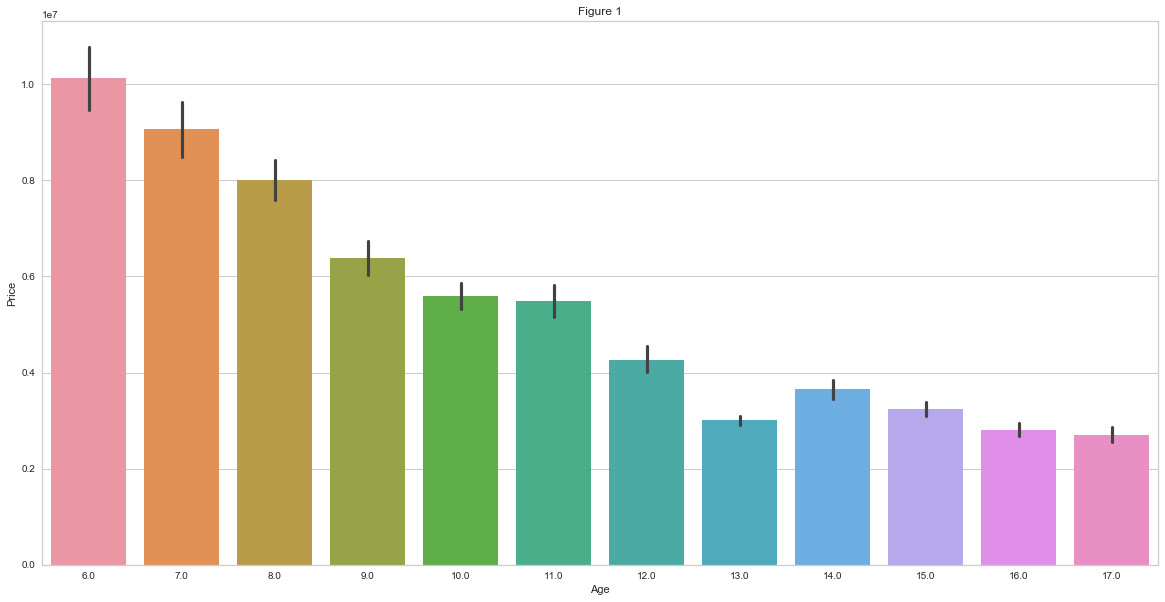

In [155]:
fig,axs=plt.subplots()
fig.set_size_inches(20,10)

p1=sns.barplot(x='Age',y='Price',data=df_new,ax=axs)
axs.set_title('Figure 1')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

The earlier the car the pricier the car which is expected as older used cars have less value and it follows a Power Lognormal Distribution

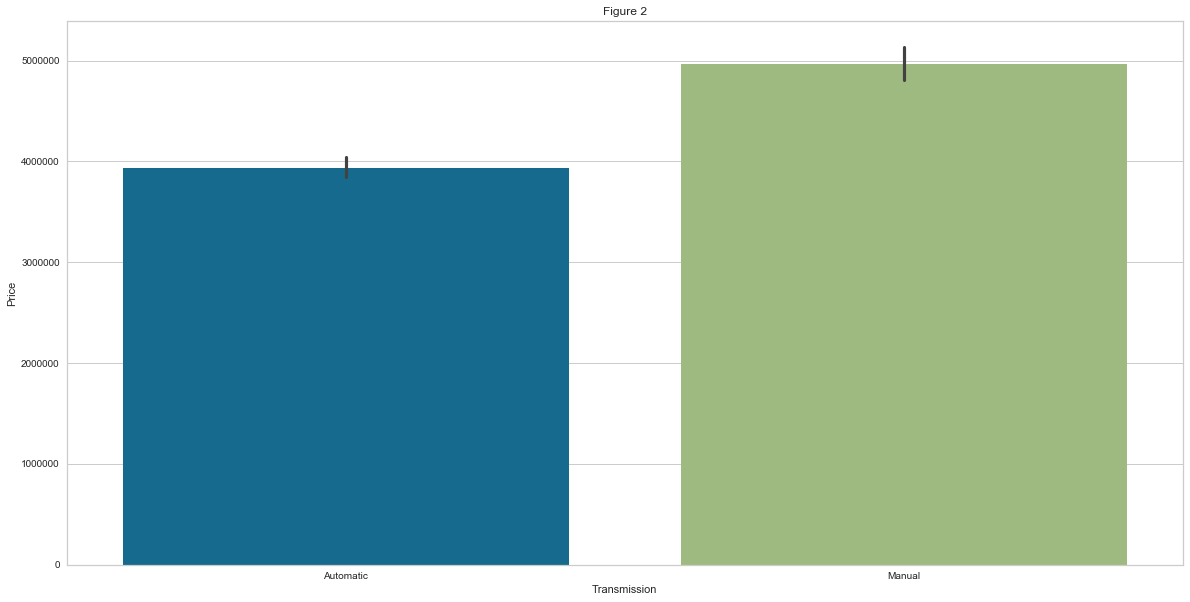

In [156]:
plt.figure(figsize=(20,10))
sns.barplot(x='Transmission',y='Price',data=df_new)
plt.title('Figure 2')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

Manual cars generally have a higher value as compared to Automatic cars which is expected

ValueError: Could not interpret input 'Year'

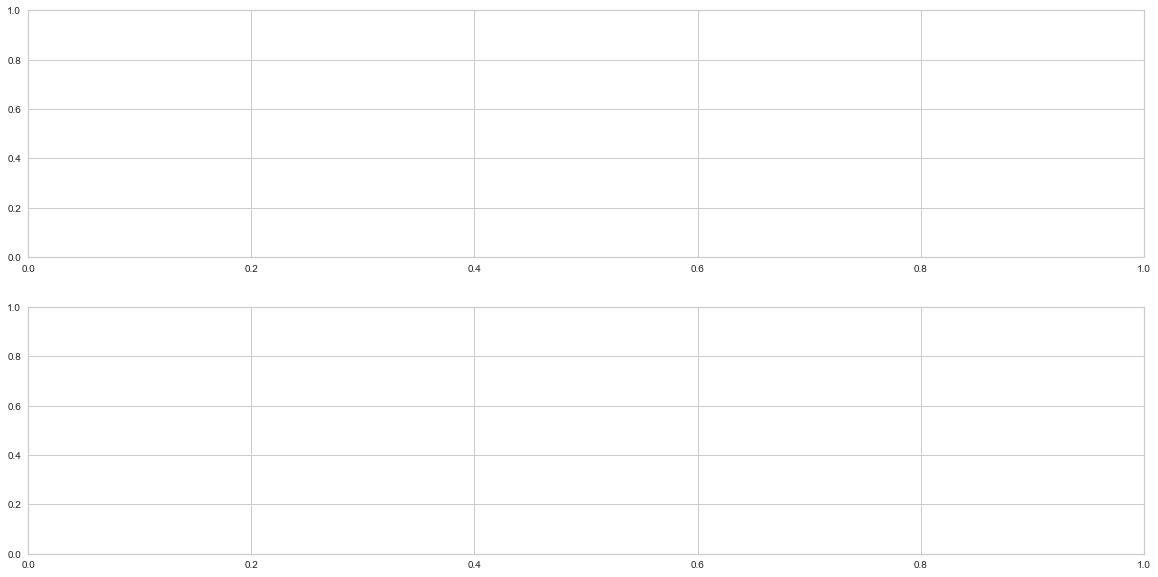

In [157]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='Year',y='Price',data=df_new,ax=axs[0])
sns.barplot(df.groupby('Year').count()['Price'].index,df.groupby('Year').count()['Price'].values,ax=axs[1])
axs[0].set_title('Figure 3')
axs[1].set_title('Figure 4')
axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.savefig('Insight-Figure-3-4.jpg',dpi=600)
plt.show()

Figure 3 : The lesser the age of the car, the pricer it is.

Figure 4: Cars age 13 has the highest number of cars available for sale


In [ ]:
df_Final.Ratings.describe()

In [ ]:
df_Final['Ratings Category'].unique()

In [ ]:
df_Final['Ratings Category'].value_counts()

In [ ]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(25,15)
sns.barplot(x='Model',y='Price',data=df_Final,ax=axs[0])
sns.barplot(x='Make',y='Price',data=df_Final,ax=axs[1])
axs[1].set_xticklabels(df_new.Make.unique(),rotation=91)
axs[0].set_title('Figure 6')
axs[1].set_title('Figure 7')
plt.tight_layout()
plt.savefig('Insight-Figure-6-7.jpg',dpi=600)
plt.show()

In [ ]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,4)
sns.barplot(df.groupby('Ratings Category').count()['Price'].index,df_Final.groupby('Ratings Category').count()['Price'].values,ax=axs[0])
sns.barplot(df.groupby('Transmission').count()['Price'].index,df_Final.groupby('Transmission').count()['Price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 8')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 9')
plt.tight_layout()
plt.show()

In [ ]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(16,10)
sns.barplot(df.groupby('Year').count()['Price'].index,df_Final.groupby('Year').count()['Price'].values,ax=axs[0])
sns.barplot(df.groupby('Make').count()['Price'].index,df_Final.groupby('Make').count()['Price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 10')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 11')
axs[1].set_xticklabels(df.groupby('Make').count()['Price'].index,rotation=90)
plt.tight_layout()
plt.show()

# Machine Learning Modelling

In [ ]:
# Transforming categorical columns values into integer values using LabelEncoder

en = preprocessing.LabelEncoder()
df_Final[cat_cols] = df_new[cat_cols].apply(en.fit_transform)
df_Final.head(5)